# 矩阵运算

In [1]:
import numpy as np

## 矩阵乘法

@ 是矩阵乘法操作符，用于两个矩阵（或矩阵和向量）之间的乘法。等同于 np.dot() 或 np.matmul()

In [2]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

result = A @ B  # 等同于 np.dot(A, B) 或 np.matmul(A, B)
result

array([[19, 22],
       [43, 50]])

## 矩阵求逆

对于两个方阵A,B,若AB = E，且E为单位阵，则A,B互逆，可记作$A = B^{-1}$, $B=A^{-1}$。

### 普通逆

在numpy和scipy中，均提供了求逆函数，分别是numpy.linalg.inv和scipy.lingalg.inv。

In [1]:
import numpy as np
import scipy.linalg as sl
import numpy.linalg as nl

In [2]:
a = np.array([[1,8,3],[2,4,6],[5,6,8]])
b = np.array([[1,2,3],[2,4,6],[5,6,8]])
c = np.array([[1,2,3],[1,2,3],[5,6,8]])

In [3]:
nl.inv(a)

array([[-4.76190476e-02, -5.47619048e-01,  4.28571429e-01],
       [ 1.66666667e-01, -8.33333333e-02, -4.08170230e-18],
       [-9.52380952e-02,  4.04761905e-01, -1.42857143e-01]])

In [4]:
sl.inv(a)

array([[-0.04761905, -0.54761905,  0.42857143],
       [ 0.16666667, -0.08333333,  0.        ],
       [-0.0952381 ,  0.4047619 , -0.14285714]])

In [5]:
nl.inv(b)

LinAlgError: Singular matrix

### 奇异矩阵

奇异矩阵是线性代数的概念，就是该矩阵的秩不是满秩。

1.  首先，看这个矩阵是不是方阵

2.  再看此矩阵的行列式|A|是否等于0，若等于0，称矩阵A为奇异矩阵

3.  若不等于0，称矩阵A为非奇异矩阵

 

用途：

1.  这样可以得出一个重要结论:可逆矩阵就是非奇异矩阵，非奇异矩阵也是可逆矩阵。

2.  如果A为奇异矩阵，则AX=0有无穷解，AX=b有无穷解或者无解；

3.  如果A为非奇异矩阵，则AX=0有且只有唯一零解，AX=b有唯一解。

### 广义逆

对于复矩阵A而言，若存在复矩阵G，满足

$$A G A = A$$
$$G A G = G$$
$$(AG)^H=AG$$
$$(GA)^H=GA$$
其中$*^H$表示共轭转置，则称G为A的穆尔-彭罗斯广义逆，也叫加号逆，记作$G=A^+ $。

scipy.linalg提供了两个求加号逆的矩阵，分别是pinv和pinvh，分别用于实矩阵和复矩阵。

In [7]:
sl.inv(c)

LinAlgError: singular matrix

In [6]:
sl.pinv(c)

array([[-0.57971014, -0.57971014,  0.42028986],
       [ 0.02898551,  0.02898551,  0.02898551],
       [ 0.34057971,  0.34057971, -0.15942029]])

### 共线性

In [8]:
# 多重共线性识别与处理
def __new_multi(matrix):
    # 计算相关系数
    corr = np.corrcoef(matrix)

    # 获取值为1的索引，针对的是行数据
    index = np.argwhere(corr >= 0.95)

    # 获取共线性对应的行索引
    row_indexs = set()
    for i in range(index.shape[0]):
        if index[i][0] != index[i][1]:
            row_indexs = row_indexs.union(set(index[i]))

    # 定义新矩阵
    matrix = np.float64(matrix)
    new_matrix = np.zeros_like(matrix)
    m, n = matrix.shape[0], matrix.shape[1]
    delta = np.abs(matrix[matrix != 0].min()) * 0.00001

    # 对共线性的行进行处理
    for j in range(m):
        for k in range(n):
            if j in list(row_indexs):
                value = matrix[j][k] + np.abs(np.random.randn() * delta)
                new_matrix[j][k] = value
            else:
                new_matrix[j][k] = matrix[j][k]
    return new_matrix

In [9]:
sl.inv(__new_multi(c))

array([[ 3.25342190e+04, -3.25365190e+04,  8.03257128e-01],
       [-1.13868258e+05,  1.13872307e+05, -1.31134519e+00],
       [ 6.50673896e+04, -6.50689894e+04,  6.06473621e-01]])

### 验证逆是否准确

In [10]:
c@(sl.inv(__new_multi(c)))@c

array([[0.9999856 , 1.99998844, 2.99998697],
       [0.9999856 , 1.99998844, 2.99998697],
       [4.99999636, 5.9999945 , 7.99999219]])

该矩阵与c近似相等，所以逆是准确的。

In [12]:
c@(sl.pinv(c))@c

array([[1., 2., 3.],
       [1., 2., 3.],
       [5., 6., 8.]])

## 矩阵转置

np.transpose() 或 .T 用于获取矩阵的转置。T 是 numpy 数组的一个简便属性。

In [4]:
A = np.array([[1, 2], [3, 4]])
A_T = A.T  # 转置矩阵
# 或者
A_T = np.transpose(A)
A_T

array([[1, 3],
       [2, 4]])

## 对角矩阵

np.diag() 用于从矩阵中提取对角线元素或生成一个对角矩阵。

In [5]:
A = np.array([[1, 2], [3, 4]])
diag_A = np.diag(A)  # 提取对角线元素 [1, 4]
diag_A

array([1, 4])

In [6]:
diag_elements = np.array([1, 2, 3])
diag_matrix = np.diag(diag_elements)  # 生成对角矩阵
diag_matrix

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

## 矩阵的迹

np.trace() 用于计算矩阵的 迹，即矩阵的对角线元素之和。

In [7]:
A = np.array([[1, 2], [3, 4]])
trace_A = np.trace(A)  # 计算迹，结果为 1 + 4 = 5
trace_A

5

## 爱因斯坦求和约定

np.einsum() 提供了一种灵活的方式来进行多维数组运算，支持矩阵乘法、转置、迹等各种线性代数操作。它通过爱因斯坦求和约定指定操作，并可以优化性能。

In [8]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 矩阵乘法
result = np.einsum('ik,kj->ij', A, B)
result

array([[19, 22],
       [43, 50]])

## 特征值与特征向量

np.linalg.eig() 用于计算矩阵的特征值和特征向量。返回特征值和特征向量的数组。

In [10]:
A = np.array([[1, 2], [3, 4]])
eigenvalues, eigenvectors = np.linalg.eig(A)
print("特征值：{0}，\n特征向量：{1}".format(eigenvalues, eigenvectors))

特征值：[-0.37228132  5.37228132]，
特征向量：[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


## 奇异值分解

np.linalg.svd() 用于进行 奇异值分解（SVD），将矩阵分解为三个矩阵 
U, 
Σ, 和 
$V^T$
 ，常用于降维和数据压缩。

In [11]:
A = np.array([[1, 2], [3, 4], [5, 6]])
U, S, Vt = np.linalg.svd(A)

# 定积分运算

In [2]:
# 导入包
from scipy.integrate import simpson
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

# 数据部分
# 数据来自于matlab doc
vel = np.array([0, 0.45, 1.79, 4.02, 7.15, 11.18, 16.09, 21.90, 29.05, 29.05,
29.05, 29.05, 29.05, 22.42, 17.9, 17.9, 17.9, 17.9, 14.34, 11.01,
8.9, 6.54, 2.03, 0.55, 0])

# 如果为时间数据，需要保证时间之间没有缺失，如果有需要先补点再计算
time = np.arange(vel.shape[0])

# 求积分部分
simpson(vel, time)
# > 344.793333333333

344.7933333333334

# 优化方法

## 最小二乘法

最小二乘法（Least Squares Method）是一种用于解决数据拟合问题的数学优化方法，特别适用于回归分析中。其目标是通过最小化误差的平方和来找到最佳拟合线或曲线。

### 线性回归中的最小二乘法

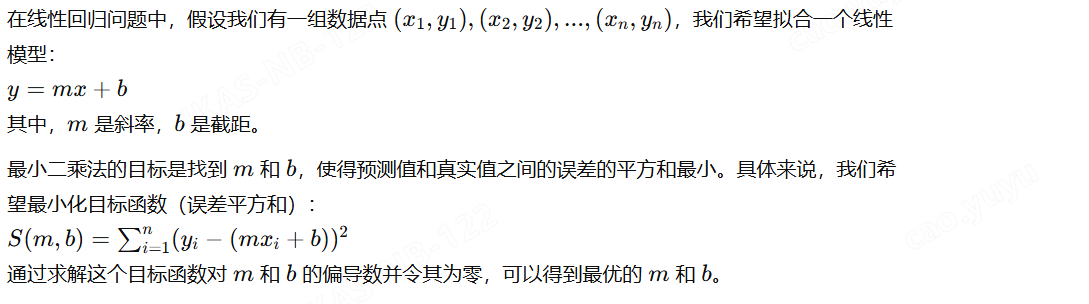

### 矩阵形式的最小二乘法

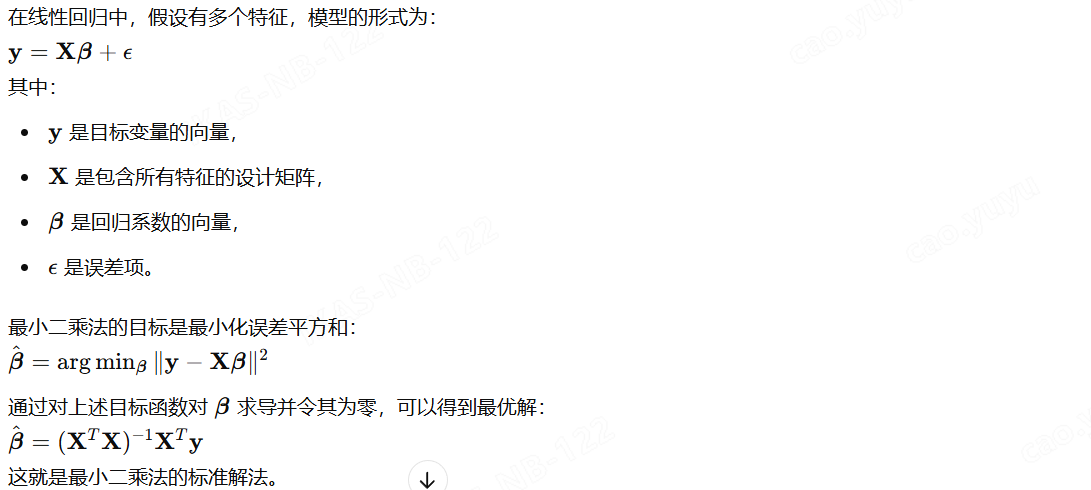

## 梯度下降法

梯度下降法是一种迭代优化方法，目标是通过反复调整模型参数，沿着梯度的方向（即误差函数最陡下降的方向）逐步逼近损失函数的最小值。

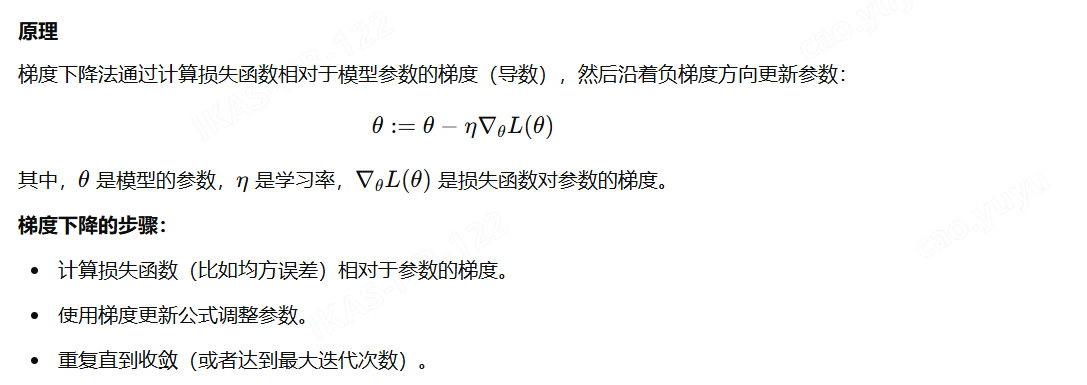

### 最小二乘法与梯度下降法的对比

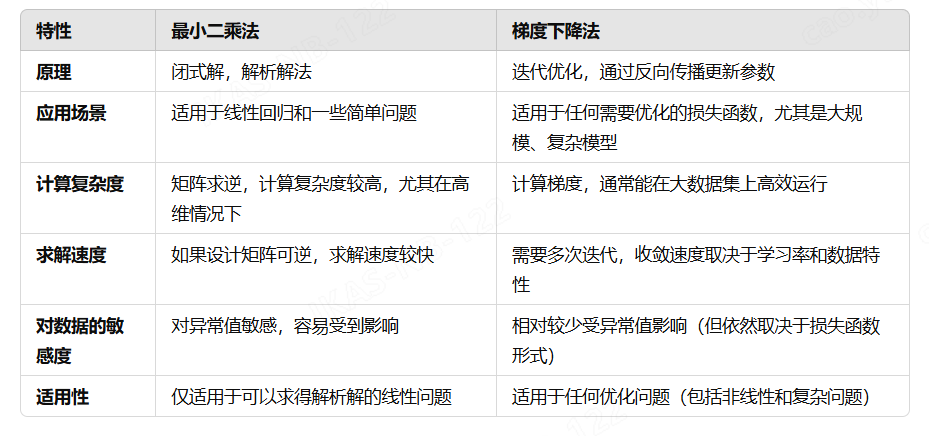